# mmdruler
Detect defects in a ruler.


# Description

The input image is a gray-scale image of a ruler, that has a number touching a tick mark. This number and mark are detected based on morphological and connected filtering.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt
print(ia.__version__)

ia870 Python Morphology Toolbox version 0.8 25th Aug 2014 - in progress - migrating to Python 3


# Reading

The gray-scale image of the ruler is read. 

(-0.5, 255.5, 199.5, -0.5)

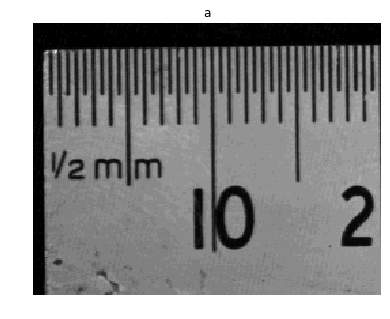

In [2]:
a_pil = Image.open('../data/mm3.tif').convert('L')
a = np.array (a_pil)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Segmentation

The close top-hat operator followed by a thresholding is applied. 

(-0.5, 255.5, 199.5, -0.5)

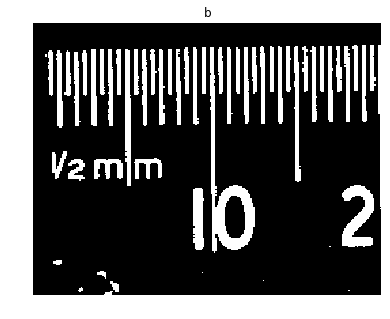

In [3]:
b = ia.iathreshad(ia.iacloseth(a,ia.iasebox(5)),40);

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('b')
axes.imshow(b, cmap='gray')
axes.axis('off')

# Size filtering

The vertical lines longer than 50 pixels are detected. 

(-0.5, 255.5, 199.5, -0.5)

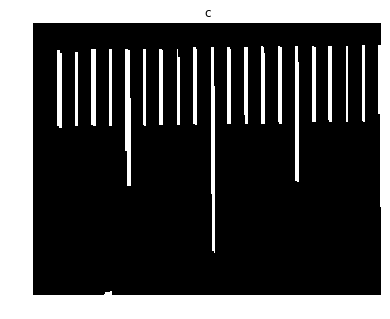

In [4]:
c = ia.iaopen(b,ia.iaseline(50,90))

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('c')
axes.imshow(c, cmap = 'gray')
axes.axis('off')

# Ruler tick marks filtering

It closes ruler tick marks gaps.

(-0.5, 255.5, 199.5, -0.5)

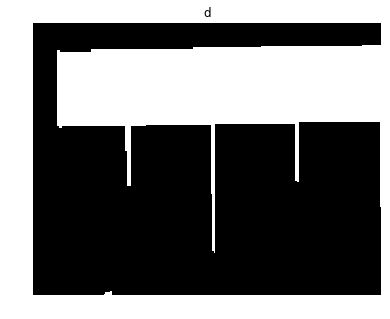

In [5]:
d =ia.iaclose(c,ia.iaseline(15))

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('d')
axes.imshow(d, cmap='gray')
axes.axis('off')

## Ruler tick marks connection

It detects all objects connected to the ruler tick markers. 

(-0.5, 255.5, 199.5, -0.5)

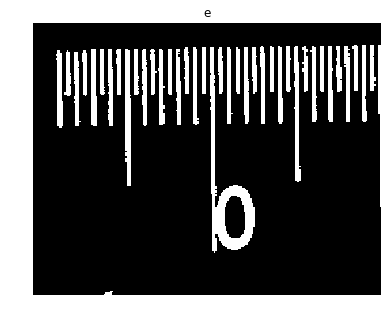

In [6]:
e = ia.iainfrec(d,b)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('e')
axes.imshow(e, cmap='gray')
axes.axis('off')

## Ruler tick mark vertical connection

It detects all objects vertically connected to the ruler tick mark. Note that the 3x1 rectangle is used as structuring element in the vertical reconstruction. 

(-0.5, 255.5, 199.5, -0.5)

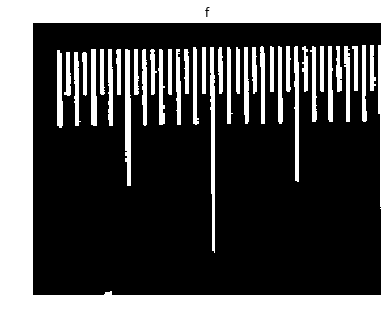

In [7]:
f = ia.iainfrec(d,b,ia.iaseline(3,90));

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(f, cmap='gray')
axes.axis('off')

## Non ruler tick mark vertical connection

The residues obtained from the previous image. 

(-0.5, 255.5, 199.5, -0.5)

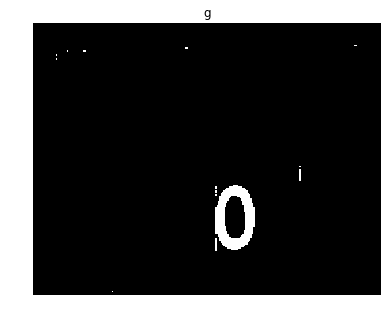

In [8]:
g = ia.iasubm(e,f)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('g')
axes.imshow(g, cmap='gray')
axes.axis('off')

## Ruler tick marks detection

It uses an opening by an elementary cross structuring element to eliminate the artifacts. 

(-0.5, 255.5, 199.5, -0.5)

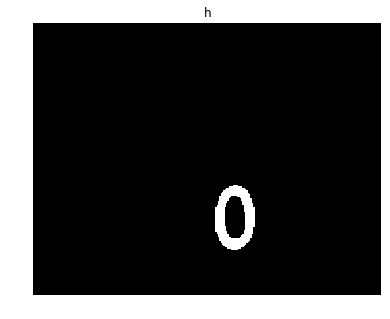

In [9]:
h = ia.iaopen(g)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('h')
axes.imshow(h, cmap='gray')
axes.axis('off')

## Objects detection

It detects the objects connected to ruler tick marks. A reconstruction from the ruler marks detected is applied. 

(-0.5, 255.5, 199.5, -0.5)

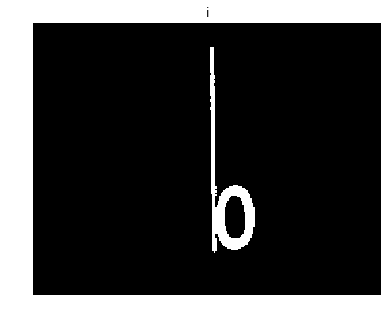

In [10]:
i = ia.iainfrec(h, b)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('i')
axes.imshow(i, cmap='gray')
axes.axis('off')

## Final presentation

Overlay the detected defect over the original image 

(-0.5, 255.5, 199.5, -0.5)

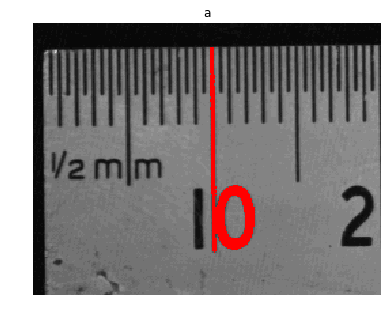

In [11]:
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(ia.iagshow(a, i).transpose (1, 2, 0))
axes.axis('off')